# Probando con Twitter

In [4]:
import requests
import tweepy
import os
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
api_key = os.environ.get('api_key')
api_secret_key = os.environ.get('api_secret_key')
bearer_token = os.environ.get('bearer_token')
access_token = os.environ.get('access_token')
access_token_secret = os.environ.get('access_token_secret')

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)  

try:
    api.verify_credentials()
    print('Successful Authentication')
except:
    print('Failed authentication')

Successful Authentication


A pesar de una conexión exitosa, tras diferentes pruebas de llamada, se recibe el error:  

"Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level."  

Por esto, se decide cambiar de método, utilizando el endpoint proporcionado.

# Recopilación de Tweets

In [80]:
from datetime import datetime
import numpy as np
import pandas as pd
import requests

In [81]:
url2022 = "http://twitterdata-env-1.eba-znn3kr4u.us-east-2.elasticbeanstalk.com/get_data?year=2022"

response = requests.get(url2022)
data = response.json()
users_data = data['includes']['users']

df_tweets = pd.DataFrame(data['data'])
df_users = pd.DataFrame(users_data)

df_2022 = pd.merge(df_tweets, df_users, left_on='author_id', right_on='id', suffixes=('_tweet', '_user'))
df_2022.head()

,author_id,created_at,edit_history_tweet_ids,id_tweet,public_metrics,text,id_user,name,username
0,1151510939105144834,2022-12-29T16:39:19.000Z,[1608502937332113408],1608502937332113408,"{'impression_count': 113, 'like_count': 4, 'qu...",Empieza el año formándote en una de las profes...,1151510939105144834,EDEM universitarios,EDEM_uni
1,570795448,2022-12-29T12:52:11.000Z,[1608445776732246017],1608445776732246017,"{'impression_count': 124, 'like_count': 2, 'qu...",Los 4 bootcamps tecnológicos de EDEM y @TheBri...,570795448,EDEM,EDEMempresarios
2,570795448,2022-12-27T09:00:57.000Z,[1607662809575292929],1607662809575292929,"{'impression_count': 218, 'like_count': 5, 'qu...",Si estás buscando una profesión que te cambie ...,570795448,EDEM,EDEMempresarios
3,570795448,2022-12-21T10:12:46.000Z,[1605506556123963392],1605506556123963392,"{'impression_count': 329, 'like_count': 6, 'qu...",#EDEMpoweredbyTheBridge la revolución formativ...,570795448,EDEM,EDEMempresarios
4,1128860148,2022-12-29T09:16:11.000Z,[1608391421014196224],1608391421014196224,"{'impression_count': 49, 'like_count': 2, 'quo...",@EDEMempresarios acoge el 12 de enero un Open ...,1128860148,Economía 3,Economia_3


In [82]:
url2023 = "http://twitterdata-env-1.eba-znn3kr4u.us-east-2.elasticbeanstalk.com/get_data?year=2023"

response = requests.get(url2023)
data = response.json()
users_data = data['includes']['users']

df_tweets = pd.DataFrame(data['data'])
df_users = pd.DataFrame(users_data)

df_2023 = pd.merge(df_tweets, df_users, left_on='author_id', right_on='id', suffixes=('_tweet', '_user'))
df_2023.head()

,author_id,created_at,edit_history_tweet_ids,id_tweet,public_metrics,text,id_user,name,username
0,936539844079218688,2023-03-07T17:16:14.000Z,[1633154604018876416],1633154604018876416,"{'impression_count': 357, 'like_count': 8, 'qu...",¡Hola #dataholics! La primavera trompetera se ...,936539844079218688,DatabeerSVQ,DatabeerSVQ
1,1585726199485140993,2023-03-06T10:38:30.000Z,[1632692123412594688],1632692123412594688,"{'impression_count': 31, 'like_count': 0, 'quo...",Las inscripciones se realizarán por Eventbrite...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO
2,1585726199485140993,2023-03-06T10:38:30.000Z,[1632692120719859712],1632692120719859712,"{'impression_count': 950, 'like_count': 5, 'qu...",¡Por fin podemos publicar el cartel con los po...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO
3,41545659,2023-03-06T08:48:56.000Z,[1632664546665025536],1632664546665025536,"{'impression_count': 90, 'like_count': 3, 'quo...","Encuentro de la @mlopscommunity en Madrid: ""ML...",41545659,Mario Lopez de Avila,nodosenlared
4,41545659,2023-01-24T20:44:09.000Z,[1617986634817105922],1617986634817105922,"{'impression_count': 163, 'like_count': 3, 'qu...","Advanced #Cynefin, Estuarine mapping &amp; EUF...",41545659,Mario Lopez de Avila,nodosenlared


In [83]:
tweets = pd.concat([df_2022, df_2023])
tweets = tweets.drop(columns=['edit_history_tweet_ids', 'author_id'])
# Las borro por ser columnas redundantes
tweets

,created_at,id_tweet,public_metrics,text,id_user,name,username
0,2022-12-29T16:39:19.000Z,1608502937332113408,"{'impression_count': 113, 'like_count': 4, 'qu...",Empieza el año formándote en una de las profes...,1151510939105144834,EDEM universitarios,EDEM_uni
1,2022-12-29T12:52:11.000Z,1608445776732246017,"{'impression_count': 124, 'like_count': 2, 'qu...",Los 4 bootcamps tecnológicos de EDEM y @TheBri...,570795448,EDEM,EDEMempresarios
2,2022-12-27T09:00:57.000Z,1607662809575292929,"{'impression_count': 218, 'like_count': 5, 'qu...",Si estás buscando una profesión que te cambie ...,570795448,EDEM,EDEMempresarios
3,2022-12-21T10:12:46.000Z,1605506556123963392,"{'impression_count': 329, 'like_count': 6, 'qu...",#EDEMpoweredbyTheBridge la revolución formativ...,570795448,EDEM,EDEMempresarios
4,2022-12-29T09:16:11.000Z,1608391421014196224,"{'impression_count': 49, 'like_count': 2, 'quo...",@EDEMempresarios acoge el 12 de enero un Open ...,1128860148,Economía 3,Economia_3
...,...,...,...,...,...,...,...
84,2023-01-12T12:54:44.000Z,1613519848339808262,"{'impression_count': 153, 'like_count': 1, 'qu...",¿Quieres dedicarte al #desarrolloweb?\n¡Conéct...,2529499620,Formación Fundación Universidad Carlos III,formacion_fuc3
85,2023-01-12T10:20:00.000Z,1613480908304048132,"{'impression_count': 342, 'like_count': 4, 'qu...",🧐 ¿Quieres ser un profesional de la #cibersegu...,874916978665938945,Startup Valencia,Startup_VLC
86,2023-01-02T15:15:00.000Z,1609931268921114627,"{'impression_count': 593, 'like_count': 5, 'qu...",🤝 @EDEMempresarios se alía con @TheBridge_Tech...,874916978665938945,Startup Valencia,Startup_VLC
87,2023-01-09T09:41:46.000Z,1612384123816910852,"{'impression_count': 967, 'like_count': 4, 'qu...",¿Quieres desarrollar tu carrera en el mundo di...,570795448,EDEM,EDEMempresarios


## Corrección de datos

In [84]:
tweets[['id_tweet', 'id_user']] = tweets[['id_tweet', 'id_user']].astype(np.int64)

In [85]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [86]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 88
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      149 non-null    datetime64[ns]
 1   id_tweet        149 non-null    int64         
 2   public_metrics  149 non-null    object        
 3   text            149 non-null    object        
 4   id_user         149 non-null    int64         
 5   name            149 non-null    object        
 6   username        149 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 9.3+ KB


## Redistribución de datos de la columna de métricas

In [87]:
tweets = pd.concat([tweets, tweets['public_metrics'].apply(pd.Series)], axis=1)

In [88]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 88
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   created_at        149 non-null    datetime64[ns]
 1   id_tweet          149 non-null    int64         
 2   public_metrics    149 non-null    object        
 3   text              149 non-null    object        
 4   id_user           149 non-null    int64         
 5   name              149 non-null    object        
 6   username          149 non-null    object        
 7   impression_count  149 non-null    int64         
 8   like_count        149 non-null    int64         
 9   quote_count       149 non-null    int64         
 10  reply_count       149 non-null    int64         
 11  retweet_count     149 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 15.1+ KB


In [89]:
tweets = tweets.sort_values('created_at')
tweets = tweets.reset_index()
tweets = tweets.drop(columns='index')
tweets

,created_at,id_tweet,public_metrics,text,id_user,name,username,impression_count,like_count,quote_count,reply_count,retweet_count
0,2022-11-22 08:01:31,1594964278238654471,"{'impression_count': 0, 'like_count': 2, 'quot...","Aprende hoy las profesiones del futuro, ¡inscr...",702077405045899264,Fundación BBK | Obra Social,BBK_eus,0,2,0,0,2
1,2022-11-22 08:05:10,1594965197613322241,"{'impression_count': 0, 'like_count': 2, 'quot...","Ikasi gaur etorkizuneko lanbideak, izena eman ...",702077405045899264,Fundación BBK | Obra Social,BBK_eus,0,2,0,0,1
2,2022-11-22 08:18:42,1594968601265586178,"{'impression_count': 0, 'like_count': 3, 'quot...",Acelerando juntos el #talentodigital en España...,783248945761910788,Hopla! Software,HoplaSoftware,0,3,0,1,1
3,2022-11-23 10:13:36,1595359906747617280,"{'impression_count': 0, 'like_count': 3, 'quot...",¡Ven a conocer los BBK bootcamps powered by @T...,1162694149956603904,The Bridge,TheBridge_Tech,0,3,0,0,4
4,2022-11-24 12:15:15,1595752907684843520,"{'impression_count': 0, 'like_count': 4, 'quot...",🔵Acelera tu carrera digital con #BBKBootcamps....,823470817963032576,BBK network,BBKnetwork,0,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
144,2023-03-04 22:32:56,1632147141224275970,"{'impression_count': 35, 'like_count': 1, 'quo...",@nodosenlared @snowded @TheBridge_Tech Muy bue...,925597948410580993,Valerio Rocco Lozano,RoccoLozano,35,1,0,0,0
145,2023-03-06 08:48:56,1632664546665025536,"{'impression_count': 90, 'like_count': 3, 'quo...","Encuentro de la @mlopscommunity en Madrid: ""ML...",41545659,Mario Lopez de Avila,nodosenlared,90,3,0,0,1
146,2023-03-06 10:38:30,1632692120719859712,"{'impression_count': 950, 'like_count': 5, 'qu...",¡Por fin podemos publicar el cartel con los po...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO,950,5,1,1,3
147,2023-03-06 10:38:30,1632692123412594688,"{'impression_count': 31, 'like_count': 0, 'quo...",Las inscripciones se realizarán por Eventbrite...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO,31,0,0,0,0


In [110]:
tweets = tweets.drop(columns='public_metrics')

# Base de Datos

In [91]:
import pymysql

In [96]:
username = os.environ.get('username')
password = os.environ.get('password')
host = os.environ.get('host')
port = 3306

In [155]:
db = pymysql.connect(host = host,
                     user = username,
                     password = password,
                     cursorclass = pymysql.cursors.DictCursor)

cursor = db.cursor()

In [98]:
create_db = '''CREATE DATABASE TwitterTheBridge_database'''
cursor.execute(create_db)

1

## Creación de Tablas

In [144]:
cursor.connection.commit()
use_db = ''' USE TwitterTheBridge_database'''
cursor.execute(use_db)

create_table = '''
CREATE TABLE tweets (
    id INT NOT NULL AUTO_INCREMENT,
    created_at TIMESTAMP,
    id_tweet INT, 
    text TEXT,
    id_user INT,
    name TEXT,
    username TEXT,
    PRIMARY KEY (id),
    FOREIGN KEY (id) REFERENCES public_metrics(id))
'''

cursor.execute(create_table)

0

In [143]:
create_table2 = '''
CREATE TABLE public_metrics (
    id INT NOT NULL AUTO_INCREMENT,
    impression_count INT,
    like_count	INT,
    quote_count INT, 
    reply_count	INT,
    retweet_count INT,
    PRIMARY KEY (id))
'''

cursor.execute(create_table2)

0

In [141]:
cursor.execute("DROP TABLE IF EXISTS public_metrics;")

0

In [145]:
cursor.execute('SHOW TABLES')
cursor.fetchall()

[{'Tables_in_TwitterTheBridge_database': 'public_metrics'},
 {'Tables_in_TwitterTheBridge_database': 'tweets'}]

## Preparación de Datos

In [115]:
tweetsbd = tweets.iloc[:, :6]
tweetsbd

,created_at,id_tweet,text,id_user,name,username
0,2022-11-22 08:01:31,1594964278238654471,"Aprende hoy las profesiones del futuro, ¡inscr...",702077405045899264,Fundación BBK | Obra Social,BBK_eus
1,2022-11-22 08:05:10,1594965197613322241,"Ikasi gaur etorkizuneko lanbideak, izena eman ...",702077405045899264,Fundación BBK | Obra Social,BBK_eus
2,2022-11-22 08:18:42,1594968601265586178,Acelerando juntos el #talentodigital en España...,783248945761910788,Hopla! Software,HoplaSoftware
3,2022-11-23 10:13:36,1595359906747617280,¡Ven a conocer los BBK bootcamps powered by @T...,1162694149956603904,The Bridge,TheBridge_Tech
4,2022-11-24 12:15:15,1595752907684843520,🔵Acelera tu carrera digital con #BBKBootcamps....,823470817963032576,BBK network,BBKnetwork
...,...,...,...,...,...,...
144,2023-03-04 22:32:56,1632147141224275970,@nodosenlared @snowded @TheBridge_Tech Muy bue...,925597948410580993,Valerio Rocco Lozano,RoccoLozano
145,2023-03-06 08:48:56,1632664546665025536,"Encuentro de la @mlopscommunity en Madrid: ""ML...",41545659,Mario Lopez de Avila,nodosenlared
146,2023-03-06 10:38:30,1632692120719859712,¡Por fin podemos publicar el cartel con los po...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO
147,2023-03-06 10:38:30,1632692123412594688,Las inscripciones se realizarán por Eventbrite...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO


In [147]:
public_metrics = tweets.iloc[:, -5:]
public_metrics

,impression_count,like_count,quote_count,reply_count,retweet_count
0,0,2,0,0,2
1,0,2,0,0,1
2,0,3,0,1,1
3,0,3,0,0,4
4,0,4,0,0,3
...,...,...,...,...,...
144,35,1,0,0,0
145,90,3,0,0,1
146,950,5,1,1,3
147,31,0,0,0,0


## Subida de Datos

In [148]:
from sqlalchemy import create_engine

In [149]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(user = username,
                                                                        pw = password,
                                                                        host = host,
                                                                        db = 'TwitterTheBridge_database'))

In [150]:
public_metrics.to_sql(name = 'public_metrics',
               con = engine,
               if_exists = 'append',
               index = False)

149

In [151]:
tweetsbd.to_sql(name = 'tweets',
               con = engine,
               if_exists = 'append',
               index = False)

149

In [157]:
db.commit()

In [153]:
engine.dispose()

In [ ]:
db.close()

## Pruebas de Lectura

In [160]:
db = pymysql.connect(host = host,
                     user = username,
                     password = password,
                     cursorclass = pymysql.cursors.DictCursor,
                     database='TwitterTheBridge_database')

cursor = db.cursor()
sql = '''
SELECT *
FROM tweets
INNER JOIN public_metrics ON tweets.id = public_metrics.id
'''
cursor.execute(sql)
mi_tabla = cursor.fetchall()
mi_tabla


[{'id': 1,
  'created_at': datetime.datetime(2022, 11, 22, 8, 1, 31),
  'id_tweet': 2147483647,
  'text': 'Aprende hoy las profesiones del futuro, ¡inscríbete en el #BBKBootcamp ⏩ https://t.co/uJcCKObkPz\n\nJunto con @TheBridge_Tech podrás aprender sobre Desarrollo Web Full Stack, Data Science, Ciberseguridad y Diseño de producto digital UX UI. https://t.co/wdbmRphsAx',
  'id_user': 2147483647,
  'name': 'Fundación BBK | Obra Social',
  'username': 'BBK_eus',
  'public_metrics.id': 1,
  'impression_count': 0,
  'like_count': 2,
  'quote_count': 0,
  'reply_count': 0,
  'retweet_count': 2},
 {'id': 2,
  'created_at': datetime.datetime(2022, 11, 22, 8, 5, 10),
  'id_tweet': 2147483647,
  'text': 'Ikasi gaur etorkizuneko lanbideak, izena eman #BBKBootcamp -ean ⏩ https://t.co/xvm6ekbcMQ\n\n@TheBridge_Tech -ekin batera,  Full Stack Web Garapena, Data Science, Zibersegurtasuna eta UX UI produktu digitalaren diseinuari buruz ikasteko aukera izango duzu. https://t.co/oxEOX35Osa',
  'id_user': 

In [ ]:
db.close()

# Análisis Exploratorio

In [163]:
tweets

,created_at,id_tweet,text,id_user,name,username,impression_count,like_count,quote_count,reply_count,retweet_count
0,2022-11-22 08:01:31,1594964278238654471,"Aprende hoy las profesiones del futuro, ¡inscr...",702077405045899264,Fundación BBK | Obra Social,BBK_eus,0,2,0,0,2
1,2022-11-22 08:05:10,1594965197613322241,"Ikasi gaur etorkizuneko lanbideak, izena eman ...",702077405045899264,Fundación BBK | Obra Social,BBK_eus,0,2,0,0,1
2,2022-11-22 08:18:42,1594968601265586178,Acelerando juntos el #talentodigital en España...,783248945761910788,Hopla! Software,HoplaSoftware,0,3,0,1,1
3,2022-11-23 10:13:36,1595359906747617280,¡Ven a conocer los BBK bootcamps powered by @T...,1162694149956603904,The Bridge,TheBridge_Tech,0,3,0,0,4
4,2022-11-24 12:15:15,1595752907684843520,🔵Acelera tu carrera digital con #BBKBootcamps....,823470817963032576,BBK network,BBKnetwork,0,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
144,2023-03-04 22:32:56,1632147141224275970,@nodosenlared @snowded @TheBridge_Tech Muy bue...,925597948410580993,Valerio Rocco Lozano,RoccoLozano,35,1,0,0,0
145,2023-03-06 08:48:56,1632664546665025536,"Encuentro de la @mlopscommunity en Madrid: ""ML...",41545659,Mario Lopez de Avila,nodosenlared,90,3,0,0,1
146,2023-03-06 10:38:30,1632692120719859712,¡Por fin podemos publicar el cartel con los po...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO,950,5,1,1,3
147,2023-03-06 10:38:30,1632692123412594688,Las inscripciones se realizarán por Eventbrite...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO,31,0,0,0,0


In [168]:
tweets.describe()

,created_at,id_tweet,id_user,impression_count,like_count,quote_count,reply_count,retweet_count
count,149,1.490000e+02,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000
mean,2023-01-08 17:35:21.395973120,1.612141e+18,4.511527e+17,1732.617450,5.449664,0.167785,0.295302,1.563758
min,2022-11-22 08:01:31,1.594964e+18,7.154412e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-12-02 08:40:07,1.598598e+18,4.020130e+08,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2023-01-15 13:16:24,1.614612e+18,2.402179e+09,58.000000,3.000000,0.000000,0.000000,1.000000
75%,2023-01-30 09:45:55,1.619995e+18,8.749170e+17,218.000000,4.000000,0.000000,0.000000,2.000000
max,2023-03-07 17:16:14,1.633155e+18,1.610074e+18,225761.000000,321.000000,4.000000,7.000000,49.000000
std,NaN,1.149908e+16,5.620640e+17,18487.232284,26.302923,0.537797,0.775498,4.236779


#### ¿Cuál es el tweet con mayor repercusión social?

In [176]:
# Esto podría interpretarse de diferentes maneras
# Una de ellas podría ser cuál es el tweet con mayor número de visualizaciones (impression count)

print(tweets.iloc[tweets['impression_count'].idxmax()])
print('-'*70)
print('Detalle del texto:', tweets.iloc[tweets['impression_count'].idxmax()]['text'])

created_at                                        2023-01-15 13:16:23
id_tweet                                          1614612463361695747
text                Advanced #Cynefin, Estuarine mapping &amp; EUF...
id_user                                                      41545659
name                                             Mario Lopez de Avila
username                                                 nodosenlared
impression_count                                               225761
like_count                                                        321
quote_count                                                         4
reply_count                                                         7
retweet_count                                                      49
Name: 72, dtype: object
----------------------------------------------------------------------
Detalle del texto: Advanced #Cynefin, Estuarine mapping &amp; EUFG Masterclass (Madrid) https://t.co/H5ZSjbKHAr | Los interesados en la

In [177]:
# También puede interpretarse como el tweet con mayores "me gusta"

print(tweets.iloc[tweets['like_count'].idxmax()])

# En este caso, se trata del mismo, por lo que no cabe duda de cuál es el tweet con mayor repercusión social.

created_at                                        2023-01-15 13:16:23
id_tweet                                          1614612463361695747
text                Advanced #Cynefin, Estuarine mapping &amp; EUF...
id_user                                                      41545659
name                                             Mario Lopez de Avila
username                                                 nodosenlared
impression_count                                               225761
like_count                                                        321
quote_count                                                         4
reply_count                                                         7
retweet_count                                                      49
Name: 72, dtype: object


#### ¿Cuál es el usuario que más menciona a la escuela?

In [188]:
id = tweets['id_user'].mode()[0]
id

702077405045899264

In [196]:
id_masmenciones = tweets.loc[tweets['id_user'] == id, 'name']
print(f'El usuario que más menciona The Bridge es {id_masmenciones[0]}, con {id_masmenciones.count()} menciones en el período.')

El usuario que más menciona The Bridge es Fundación BBK | Obra Social, con 22 menciones en el período.


#### ¿En qué mes se concentra el mayor número de tweets?

In [198]:
tweets['created_at'].dt.month.mode()

# El mes en el que se concentra el mayor número de tweets durante el período especificado, fue enero.

0    1
Name: created_at, dtype: int32

#### ¿Qué palabras son más frecuentes?

In [229]:
from nltk.corpus import stopwords
import re

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in stopwords.words('spanish')]))
        # También hay tweets en euskera, pero prefiero ignorarlos.
        
    return removed_stop_words

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [265]:
def notags(tweet):
    sinmenciones = re.sub(r'@\w+', '', tweet)
    sinhashtags = re.sub(r'#\w+', '', sinmenciones)
    return sinhashtags

limpio = tweets['text'].apply(notags)

In [266]:
signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def remove_marks(tweet):
    return signos.sub('', tweet.lower())

limpio = limpio.apply(remove_marks)

In [267]:
limpio = remove_stop_words(limpio)
limpio

['aprende hoy profesiones futuro ¡inscríbete ⏩ https//tco/ujcckobkpz junto podrás aprender desarrollo web full stack data science ciberseguridad diseño producto digital ux ui https//tco/wdbmrphsax',
 'ikasi gaur etorkizuneko lanbideak izena eman -ean ⏩ https//tco/xvmekbcmq -ekin batera full stack web garapena data science zibersegurtasuna eta ux ui produktu digitalaren diseinuari buruz ikasteko aukera izango duzu https//tco/oxeoxosa',
 'acelerando juntos españa próximo noviembre juan zamora presentará hopla instalaciones h contaremos quiénes hacemos cómo desarrollar fructífera https//tco/sweuswiq',
 '¡ven conocer bbk bootcamps powered by próximo open day🤗 📅 dic ⏰ 📍 urazurrutia kalea bilbao ¡lánzate carrera digital 🎟entradas https//tco/nbgxwjsyce https//tco/kfsgffomb',
 '🔵acelera carrera digital gracias colaboración podrás formarte mejores profesionales lograr trabajo proyección 🔗elige curso https//tco/rxicpzjn',
 'organiza i congreso 📅 diciembre 🙍 modalidad presencial 🏢 palacio lópez-d

In [260]:
# import emoji

# limpio = emoji.replace_emoji(limpio, '')
# limpio

# Elimina los emojis correctamente, pero después de utilizar esto, se "generan" letras que interfieren con las palabras aisladas.

"aprende hoy profesiones futuro ¡inscríbete   https//tco/ujcckobkpz junto podrás aprender desarrollo web full stack data science ciberseguridad diseño producto digital ux ui https//tco/wdbmrphsaxikasi gaur etorkizuneko lanbideak izena eman -ean   https//tco/xvmekbcmq -ekin batera full stack web garapena data science zibersegurtasuna eta ux ui produktu digitalaren diseinuari buruz ikasteko aukera izango duzu https//tco/oxeoxosaacelerando juntos españa próximo noviembre juan zamora presentará hopla instalaciones h contaremos quiénes hacemos cómo desarrollar fructífera https//tco/sweuswiq¡ven conocer bbk bootcamps powered by próximo open day    dic     urazurrutia kalea bilbao ¡lánzate carrera digital  entradas https//tco/nbgxwjsyce https//tco/kfsgffomb acelera carrera digital gracias colaboración podrás formarte mejores profesionales lograr trabajo proyección  elige curso https//tco/rxicpzjnorganiza i congreso   diciembre   modalidad presencial   palacio lópez-dóriga pº recoletos madrid 

In [269]:
from collections import Counter

# Unir todos los tokens en un solo texto
texto_unido = ' '.join(limpio)

# Contar la frecuencia de cada palabra
frecuencia_palabras = Counter(texto_unido.split())

# Ordenar las palabras por su frecuencia en orden descendente
palabras_mas_repetidas = frecuencia_palabras.most_common()

# Imprimir las palabras más repetidas
print(palabras_mas_repetidas[:10])

[('digital', 30), ('bbk', 25), ('bootcamps', 19), ('by', 18), ('gracias', 14), ('hoy', 13), ('desarrollo', 13), ('h', 12), ('🤝', 12), ('web', 10)]


#### ¿Qué correlaciones encuentras en tus datos?

In [276]:
notext = tweets.drop(columns=['text', 'name', 'username'])
notext

,created_at,id_tweet,id_user,impression_count,like_count,quote_count,reply_count,retweet_count
0,2022-11-22 08:01:31,1594964278238654471,702077405045899264,0,2,0,0,2
1,2022-11-22 08:05:10,1594965197613322241,702077405045899264,0,2,0,0,1
2,2022-11-22 08:18:42,1594968601265586178,783248945761910788,0,3,0,1,1
3,2022-11-23 10:13:36,1595359906747617280,1162694149956603904,0,3,0,0,4
4,2022-11-24 12:15:15,1595752907684843520,823470817963032576,0,4,0,0,3
...,...,...,...,...,...,...,...,...
144,2023-03-04 22:32:56,1632147141224275970,925597948410580993,35,1,0,0,0
145,2023-03-06 08:48:56,1632664546665025536,41545659,90,3,0,0,1
146,2023-03-06 10:38:30,1632692120719859712,1585726199485140993,950,5,1,1,3
147,2023-03-06 10:38:30,1632692123412594688,1585726199485140993,31,0,0,0,0


Text(0.5, 1.0, 'Correlaciones en los tweets de noviembre de 2022 a marzo de 2023')

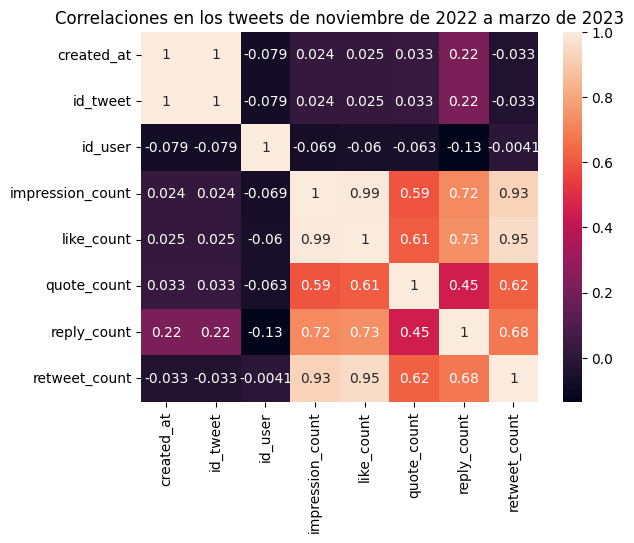

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(notext.corr(), annot=True)
plt.title('Correlaciones en los tweets de noviembre de 2022 a marzo de 2023')

Claramente se pueden observar correlaciones entre las métricas, que era algo que cabía esperar, puesto que, si se ve más veces un tweet, más probabilidades hay de hayan interacciones con el mismo.

#### Conclusiones Extra

* 

# Machine Learning

In [9]:
import pickle
import sklearn

model = pickle.load(open('model/finished_model','rb'))

In [10]:
model

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('cls', LogisticRegression(max_iter=10000))])

El modelo se trata de una regresión logística, es decir, un modelo supervisado de clasificación, acoplado con un count vectorizer (una herramienta de NLP que permite realizar un conteo de los tokens de un texto) mediante un pipeline (una "tubería" de procedimientos).

Por lo mismo, se puede asumir que se trata de un modelo de clasificación de tweets de alguna manera, como podría ser si un tweet habla de sensaciones positivas o negativas; de si un texto es demasiado largo para un tweet o no; y muchas otras clasificaciones. El mismo enunciado proporciona la información de que efectivamente se trata de un clasificador de emociones en un tweet.

#### ¿Cuáles son las predicciones? Interpreta los resultados.

In [296]:
model.predict(tweets['text'])

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

Lamentablemente, el modelo no viene con instrucciones, por lo que habría que repasar los datos para saber qué significa exactamente un 0 y un 1.

In [300]:
tweets['text'].iloc[0]
# Este primer tweet recibe una predicción de 0

'Aprende hoy las profesiones del futuro, ¡inscríbete en el #BBKBootcamp ⏩ https://t.co/uJcCKObkPz\n\nJunto con @TheBridge_Tech podrás aprender sobre Desarrollo Web Full Stack, Data Science, Ciberseguridad y Diseño de producto digital UX UI. https://t.co/wdbmRphsAx'

In [302]:
tweets['text'].iloc[3]
# Este otro, recibe una predicción de 1

'¡Ven a conocer los BBK bootcamps powered by @TheBridge_Tech! @BBK_eus \n\nPróximo Open Day🤗\n📅1 dic\n⏰18.30\n📍 @BBK_Kuna, Urazurrutia Kalea 3, Bilbao\n\n¡Lánzate a por una carrera digital!\n \n🎟Entradas https://t.co/NBgXWjSYcE\n\n#uxui #ciber #desarrollowebfullstack #datascience https://t.co/KFsgFfom5B'

A juzgar de la aparente neutralidad del tweet con predicción de 0, parece que efectivamente 1 se trata de tweets "positivos", mientras que 0 "negativos" (o simplemente "no positivos")

In [320]:
model.predict(limpio)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [306]:
tweets['predict'] = model.predict(tweets['text'])
tweets

,created_at,id_tweet,text,id_user,name,username,impression_count,like_count,quote_count,reply_count,retweet_count,predict
0,2022-11-22 08:01:31,1594964278238654471,"Aprende hoy las profesiones del futuro, ¡inscr...",702077405045899264,Fundación BBK | Obra Social,BBK_eus,0,2,0,0,2,0
1,2022-11-22 08:05:10,1594965197613322241,"Ikasi gaur etorkizuneko lanbideak, izena eman ...",702077405045899264,Fundación BBK | Obra Social,BBK_eus,0,2,0,0,1,1
2,2022-11-22 08:18:42,1594968601265586178,Acelerando juntos el #talentodigital en España...,783248945761910788,Hopla! Software,HoplaSoftware,0,3,0,1,1,0
3,2022-11-23 10:13:36,1595359906747617280,¡Ven a conocer los BBK bootcamps powered by @T...,1162694149956603904,The Bridge,TheBridge_Tech,0,3,0,0,4,1
4,2022-11-24 12:15:15,1595752907684843520,🔵Acelera tu carrera digital con #BBKBootcamps....,823470817963032576,BBK network,BBKnetwork,0,4,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144,2023-03-04 22:32:56,1632147141224275970,@nodosenlared @snowded @TheBridge_Tech Muy bue...,925597948410580993,Valerio Rocco Lozano,RoccoLozano,35,1,0,0,0,0
145,2023-03-06 08:48:56,1632664546665025536,"Encuentro de la @mlopscommunity en Madrid: ""ML...",41545659,Mario Lopez de Avila,nodosenlared,90,3,0,0,1,1
146,2023-03-06 10:38:30,1632692120719859712,¡Por fin podemos publicar el cartel con los po...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO,950,5,1,1,3,0
147,2023-03-06 10:38:30,1632692123412594688,Las inscripciones se realizarán por Eventbrite...,1585726199485140993,Asociación de Estudiantes de Software Libre UPO,ESOLIUPO,31,0,0,0,0,1


In [310]:
tweets[tweets['predict'] == 0]['text'][4]

'🔵Acelera tu carrera digital con #BBKBootcamps.\n\nGracias a la colaboración entre @BBK_eus y @TheBridge_Tech podrás formarte con los mejores profesionales para lograr un trabajo con proyección.\n\n🔗Elige tu curso https://t.co/RxICpzj9N6\n\n#ux #developers #ciberseguridad #datascience'

In [319]:
tweets[tweets['predict'] == 0]['text'][6]

'Álvaro quería reorientar su carrera hacia el #uxuidesign 🤳 Buscaba algo rápido y enfocado al usuario. Encontró el #bootcamp en #uxuiproductdesign de @TheBridge_Tech y tan solo unos meses más tarde ya estaba trabajando en sector 🙌\n\n¡Gracias Álvaro por contar tu experiencia! https://t.co/SqCQe2PPo1'

In [317]:
tweets[tweets['predict'] == 0]['text'][143]

'@PauMugarra @ToniDorta @TheBridge_Tech https://t.co/qv4oryC9i3'

In [313]:
tweets[tweets['predict'] == 1]['text'][43]

'¿#WebDeveloper en 9⃣ semanas? Ven a conocer el #bootcamp de @formacion_fuc3 y @TheBridge_Tech ¡Un entrenamiento 100% práctico para dominar el Stack MERN!\n\nConoce más sobre el programa y resuelve tus dudas👨\u200d💻\n\n📅 14 dic\n⏰ 17.00h\n\n¡Apúntate! 👉https://t.co/tzLp85Jy4E https://t.co/UVMqS0uyYq'

In [315]:
tweets[tweets['predict'] == 1]['text'][33]

'¿Quieres conocer todo sobre el #bootcamp de #DesarrolloWebFullStack de @TheBridge_Tech  y la @FundacionUc3  ?\n\nNo te pierdas la sesión informativa❗❗\n\n📅14 diciembre\n⏰17h.\n📍 Campus Madrid-Puerta de Toledo.\n💻 online.\n\n🎫Entrada #gratuita ➡ https://t.co/QiIRpb9108 https://t.co/rQ2WzDJMch'

Sinceramente no veo un patrón, o muchas diferencias entre las diferentes clasificaciones del modelo. No sé si pueda deberse al procesado de los datos. 

In [325]:
modelo_limpio = model.predict(limpio)
modelo_limpio

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [338]:
tweets['predict_limpio'] = model.predict(limpio)
discrepancias = tweets[tweets['predict'] != tweets['predict_limpio']]
discrepancias = discrepancias[['text', 'predict', 'predict_limpio']].reset_index().drop(columns=['index'])
discrepancias

,text,predict,predict_limpio
0,☕ Miércoles 30 NOV 9:00 @BAT_Tower Desayuno: L...,1,0
1,"@ISMSForum y @Cyber_Madrid te invitan al ""I C...",0,1
2,¿Quieres conocer todo sobre el #bootcamp de #D...,0,1
3,@TheBridge_Tech se asocia con INCO Academy pa...,1,0
4,Esta tarde a las 18:30 tenemos la presentación...,1,0
5,¿Quieres conocer todo sobre el #bootcamp de #D...,1,0
6,Agredecemos @TheBridge_Tech por acoger nuestro...,0,1
7,#EDEMpoweredbyTheBridge la revolución formativ...,1,0
8,Si estás buscando una profesión que te cambie ...,1,0
9,Ya tenemos confirmado el sitio donde haremos e...,1,0


In [341]:
discrepancias['text'][9] # Antes 1, ahora 0

'Ya tenemos confirmado el sitio donde haremos el meetup de #CPS de la semana que viene. La gente de @TheBridge_Tech, en su infinita generosidad, vuelve a dejarnos su espacio.\n\nY también tenemos título para la charla de @ddamasd: "Las ingles".\n\n¡Nos vemos allí!'

No, la verdad es que no me queda muy claro qué clase de predicciones está haciendo el modelo.

#### ¿Cómo podrías mejorar el modelo?

La mejor manera de mejorar el modelo sería entrenándolo con aún más datos, o cambiando algunos parámetros del pipeline.

He observado que tiene un número de iteraciones máximas muy alto, por lo que podría estar sobreentrenado, haciendo que sus predicciones no sean precisas. 

En un breve vistazo a los tweets, no he encontrado alguno que pueda decirse que haya tenido una connotación negativa, por lo que no podría reentrenar el modelo sin tener que improvisar datos, lo que puede comprometer su funcionamiento.

#### ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros modelos de ML?

En este caso, con modelos de lenguaje, podrían hacerse predicciones de:
* Si el tweet produce un aumento de posibles inscripciones, relacionándolo con el número de reacciones que pueda tener.
* Si determinadas empresas pueden ayudar a generar publicidad a través de tweets, o si al menos son mejores que otras (posibles partners).
* Si por sondeo de zonas es viable abrir nuevas sucursales en determinadas poblaciones.

# Solución Final

Desde un punto de vista técnico, lo primero que diría es que el modelo de machine learning podría mejorarse muchísimo; o al menos, proporcionar más información al usuario de qué predicciones está realizando. Dentro del mismo pipeline podría incluirse una opción de transformación, para que en vez de devolver resultados binarios, devuelva "Positivo" o "Negativo" (que a simple vista puede parecer lo mismo, pero en mi opinión no lo es).

También, me sorprendió que en el endpoint de la base de datos se encontraran estrictamente los datos del período solicitado; opino que la base de datos debería tener un registro completo de los tweets que se han generado y se van generando al pasar el tiempo; "los datos están vivos", y si la empresa quiere mantenerse viva, debe alimentarse de ellos.

Finalmente, se puede comentar que entre las "otras soluciones" aportadas en el apartado anterior, representan posibles tácticas a tomar para el crecimiento de la empresa, alcanzando un mayor número de clientes en un territorio más amplio.